<a href="https://colab.research.google.com/github/NishatTasnimMim/Machine-Learning/blob/main/complete_heart_disease_classification_deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk(r'C:\Users\User\Downloads\cardiacHealth'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\User\Downloads\cardiacHealth\heart.csv


In [ ]:
df=pd.read_csv(r"C:\Users\User\Downloads\cardiacHealth\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape


(303, 14)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
df.sex[df.target==1].value_counts()

1    93
0    72
Name: sex, dtype: int64

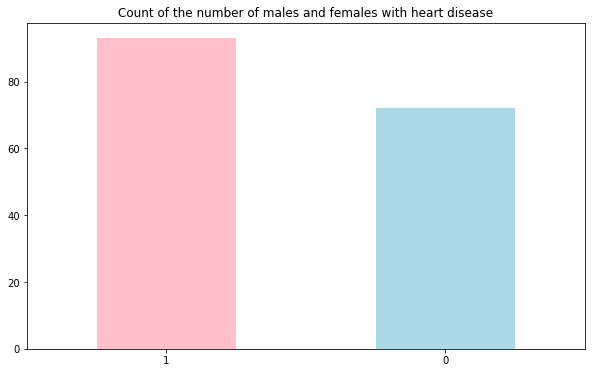

In [ ]:
df.sex[df.target==1].value_counts().plot.bar(title="Count of the number of males and females with heart disease",
                                             figsize=(10,6),color=['pink','lightblue'])
plt.xticks(rotation=0);


In [ ]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


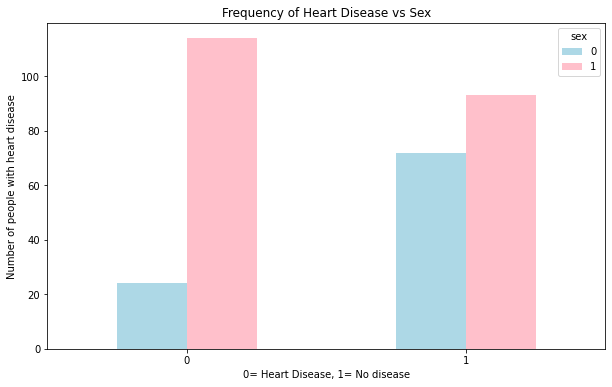

In [ ]:
pd.crosstab(df.target,df.sex).plot.bar(title="Frequency of Heart Disease vs Sex",figsize=(10,6),color=["lightblue","pink"],xlabel="0= Heart Disease, 1= No disease",
ylabel="Number of people with heart disease",legend=(["Female","Male"]))
plt.xticks(rotation=0);

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

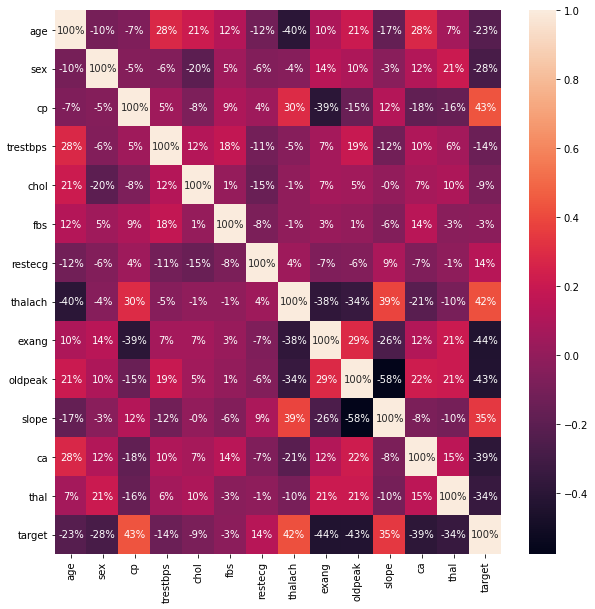

In [ ]:
corr=df.corr()
top_features = corr.index
plt.figure(figsize=(10,10))
sns.heatmap(df[top_features].corr(),annot=True, fmt='.0%')

In [ ]:
X=df.drop(['target'],axis=1)
Y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.fit_transform(X_test)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix

def evaluation(Y_test,Y_pred):
  acc=accuracy_score(Y_test,Y_pred)
  rcl=recall_score(Y_test,Y_pred)
  pre=precision_score(Y_test,Y_pred)
  auc=roc_auc_score(Y_test,Y_pred)
  f1=f1_score(Y_test,Y_pred)
 

  metric_dict={'accuracy': round(acc,3), 
               'precision': round(pre,3),
               'recall': round(rcl,3),
               'auc': round(auc,3),
               'F1 score': round(f1,3),}

  return print(metric_dict)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
lr_Y_pred=lr.predict(X_test)
lr_score=lr.score(X_test,Y_test)
evaluation(Y_test,lr_Y_pred)

{'accuracy': 0.852, 'precision': 0.838, 'recall': 0.912, 'auc': 0.845, 'F1 score': 0.873}


In [ ]:
from sklearn.svm import SVC
rsvc = SVC(kernel= 'rbf')
rsvc.fit(X_train,Y_train)
rsvc_Y_pred=rsvc.predict(X_test)
rsvc_score=rsvc.score(X_test,Y_test)
evaluation(Y_test,rsvc_Y_pred)

{'accuracy': 0.869, 'precision': 0.842, 'recall': 0.941, 'auc': 0.859, 'F1 score': 0.889}


In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train,Y_train)
svc_Y_pred=svc.predict(X_test)
svc_score=svc.score(X_test,Y_test)
evaluation(Y_test,svc_Y_pred)

{'accuracy': 0.852, 'precision': 0.838, 'recall': 0.912, 'auc': 0.845, 'F1 score': 0.873}


In [ ]:
from sklearn.svm import SVC
psvc = SVC(kernel= 'poly')
psvc.fit(X_train,Y_train)
psvc_Y_pred=psvc.predict(X_test)
psvc_score=psvc.score(X_test,Y_test)
evaluation(Y_test,psvc_Y_pred)

{'accuracy': 0.836, 'precision': 0.816, 'recall': 0.912, 'auc': 0.826, 'F1 score': 0.861}


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
gnb_Y_pred=gnb.predict(X_test)
gnb_score=gnb.score(X_test,Y_test)
evaluation(Y_test,gnb_Y_pred)

{'accuracy': 0.803, 'precision': 0.824, 'recall': 0.824, 'auc': 0.801, 'F1 score': 0.824}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc_Y_pred=dtc.predict(X_test)
dtc_score=dtc.score(X_test,Y_test)
evaluation(Y_test,dtc_Y_pred)

{'accuracy': 0.754, 'precision': 0.806, 'recall': 0.735, 'auc': 0.757, 'F1 score': 0.769}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=30,max_depth=3,random_state=3)
rf.fit(X_train,Y_train)
rf_score=rf.score(X_test,Y_test)
rf_Y_pred=rf.predict(X_test)
evaluation(Y_test,rf_Y_pred)

{'accuracy': 0.885, 'precision': 0.865, 'recall': 0.941, 'auc': 0.878, 'F1 score': 0.901}


In [ ]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','SVM With RBF Kernel',
                    'Linear SVM','SVM With Polynomial Kernel','Decision Tree',
                    'Random Forrest', 'Gaussian Naive Bayes'], 'Accuracy': [lr_score*100,
                    rsvc_score*100,svc_score*100,psvc_score*100,dtc_score*100,rf_score*100,gnb_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,85.245902
1,SVM With RBF Kernel,86.885246
2,Linear SVM,85.245902
3,SVM With Polynomial Kernel,83.606557
4,Decision Tree,75.409836
5,Random Forrest,88.524590
6,Gaussian Naive Bayes,80.327869


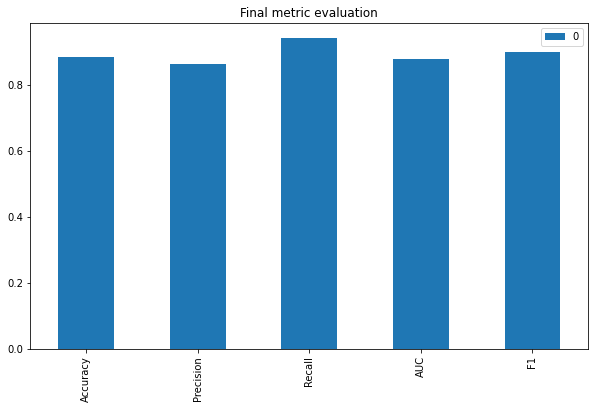

In [ ]:
final_metrics={'Accuracy': rf.score(X_test,Y_test),
                   'Precision': precision_score(Y_test,rf_Y_pred),
                   'Recall': recall_score(Y_test,rf_Y_pred),
                   'AUC': roc_auc_score(Y_test,rf_Y_pred),
                   'F1': f1_score(Y_test,rf_Y_pred)}

metrics=pd.DataFrame(final_metrics,index=[0])

metrics.T.plot.bar(title='Final metric evaluation',figsize=(10,6),legend=True);

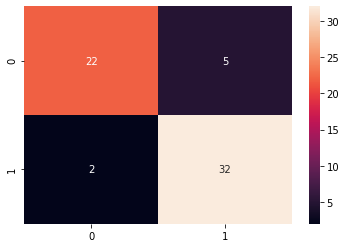

In [ ]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots()
ax=sns.heatmap(confusion_matrix(Y_test,rf_Y_pred),annot=True,cbar=True);

In [ ]:
user_input=input("Enter the values one by one")
user_input=user_input.split(",")


for i in range(len(user_input)):
    user_input[i] = float(user_input[i])

user_input=np.array(user_input)
user_input=user_input.reshape(1,-1)
user_input=scal.transform(user_input)
rf_Y_pred=rf.predict(user_input)
if(rf_Y_pred[0]==0):
  print("Warning! You have chances of getting a heart disease!")
else:
  print("You are healthy and are less likely to get a heart disease!")

Enter the values one by one


ValueError: could not convert string to float: ''

In [ ]:
import pickle as pkl
pkl.dump(rf,open('final_model.p','wb'))

In [ ]:
!pip install streamlit
!pip install pyngrok===4.1.1
from pyngrok import ngrok

In [ ]:
%%writefile healthy-heart-app.py
import streamlit as st
import base64
import sklearn
import numpy as np
import pickle as pkl
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()

model=pkl.load(open("final_model.p","rb"))





st.set_page_config(page_title="Healthy Heart App",page_icon="⚕️",layout="centered",initial_sidebar_state="expanded")



def preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal ):   
 
    
    # Pre-processing user input   
    if sex=="male":
        sex=1 
    else: sex=0
    
    
    if cp=="Typical angina":
        cp=0
    elif cp=="Atypical angina":
        cp=1
    elif cp=="Non-anginal pain":
        cp=2
    elif cp=="Asymptomatic":
        cp=2
    
    if exang=="Yes":
        exang=1
    elif exang=="No":
        exang=0
 
    if fbs=="Yes":
        fbs=1
    elif fbs=="No":
        fbs=0
 
    if slope=="Upsloping: better heart rate with excercise(uncommon)":
        slope=0
    elif slope=="Flatsloping: minimal change(typical healthy heart)":
          slope=1
    elif slope=="Downsloping: signs of unhealthy heart":
        slope=2  
 
    if thal=="fixed defect: used to be defect but ok now":
        thal=6
    elif thal=="reversable defect: no proper blood movement when excercising":
        thal=7
    elif thal=="normal":
        thal=2.31

    if restecg=="Nothing to note":
        restecg=0
    elif restecg=="ST-T Wave abnormality":
        restecg=1
    elif restecg=="Possible or definite left ventricular hypertrophy":
        restecg=2


    user_input=[age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal]
    user_input=np.array(user_input)
    user_input=user_input.reshape(1,-1)
    user_input=scal.fit_transform(user_input)
    prediction = model.predict(user_input)

    return prediction

    

       

html_temp = """ 
    <div style ="background-color:pink;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Healthy Heart App</h1> 
    </div> 
    """
      

st.markdown(html_temp, unsafe_allow_html = True) 
      

age=st.selectbox ("Age",range(1,121,1))
sex = st.radio("Select Gender: ", ('male', 'female'))
cp = st.selectbox('Chest Pain Type',("Typical angina","Atypical angina","Non-anginal pain","Asymptomatic")) 
trestbps=st.selectbox('Resting Blood Sugar',range(1,500,1))
restecg=st.selectbox('Resting Electrocardiographic Results',("Nothing to note","ST-T Wave abnormality","Possible or definite left ventricular hypertrophy"))
chol=st.selectbox('Serum Cholestoral in mg/dl',range(1,1000,1))
fbs=st.radio("Fasting Blood Sugar higher than 120 mg/dl", ['Yes','No'])
thalach=st.selectbox('Maximum Heart Rate Achieved',range(1,300,1))
exang=st.selectbox('Exercise Induced Angina',["Yes","No"])
oldpeak=st.number_input('Oldpeak')
slope = st.selectbox('Heart Rate Slope',("Upsloping: better heart rate with excercise(uncommon)","Flatsloping: minimal change(typical healthy heart)","Downsloping: signs of unhealthy heart"))
ca=st.selectbox('Number of Major Vessels Colored by Flourosopy',range(0,5,1))
thal=st.selectbox('Thalium Stress Result',range(1,8,1))



pred=preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal)




if st.button("Predict"):    
    if pred[0] == 0:
        st.error('Warning! You have high risk of getting a heart attack!')
    
    else:
        st.success('You have lower risk of getting a heart disease!')
    
   



st.sidebar.subheader("About App")

st.sidebar.info("This web app helps you to find out whether you are at a risk of developing a heart disease.")

Writing healthy-heart-app.py


In [ ]:
!nohup streamlit run healthy-heart-app.py &
url = ngrok.connect(port='8501')
url

OSError: Background processes not supported.